In [3]:
%matplotlib inline

from plan_runner.environment import ManipStationEnvironment
import numpy as np
import torch
import time
import argparse
import os

import utils
import TD3

ImportError: No module named 'pydrake'

In [5]:
# Runs policy for X episodes and returns average reward
def evaluate_policy(policy, eval_episodes=10):
    avg_reward = 0.
    for i in xrange(eval_episodes):
        print("Test {}".format(i))
        obs = env.reset()
        done = False
        while not done:
            action = policy.select_action(np.array(obs))
            obs, reward, done, _ = env.step(action)
            avg_reward += reward

    avg_reward /= eval_episodes

    print("---------------------------------------")
    print("Evaluation over %d episodes: %f" % (eval_episodes, avg_reward))
    print("---------------------------------------")
    return avg_reward

**Use this to visualize policies**

In [3]:
seed = 10
num_evals = 15
visualize = True

In [4]:
policy_name = "TD3"
env_name = "ManipStation"

file_name = "%s_%s_%s" % (policy_name, env_name, str(seed))
print("---------------------------------------")
print("Settings: %s" % (file_name))
print("---------------------------------------")

if not os.path.exists("./results"):
    exit()

env = ManipStationEnvironment(is_visualizing=visualize)
print("Starting in 1 second...")
time.sleep(1)
print("Starting!")

# Set seeds
env.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)

state_dim = env.state_dim
action_dim = env.action_space.shape[0] 
max_action = float(env.action_space.high[0])

policy = TD3.TD3(state_dim, action_dim, max_action)
policy.load(file_name, directory="./pytorch_models")

evaluate_policy(policy, eval_episodes=num_evals)

---------------------------------------
Settings: TD3_ManipStation_10
---------------------------------------
You can open the visualizer by visiting the following URL:
http://127.0.0.1:7000/static/
Setting up visualizer...
Starting in 1 second...
Starting!
Test 0
Test 1
Test 2
Test 3
Test 4
Test 5
Test 6
Test 7
Test 8
Test 9
Test 10
Test 11
Test 12
Test 13
Test 14
---------------------------------------
Evaluation over 15 episodes: -29.091591
---------------------------------------


-29.091590850948684

**Use this for charts**

In [6]:
def moving_average(data_set, periods=10):
    weights = np.ones(periods) / periods
    return np.convolve(data_set, weights, mode='valid')

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plot
import numpy as np

sns.set_style("ticks")
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
params = {'legend.fontsize': 12}
plot.rcParams.update(params)

BASE_DIR = '/home/samir/Documents/6881/final_project/results/'
FIGURE_NAME = 'figures/test.png'

CONV_SIZE = 100
NUM_SEEDS = 10

SHOW = True
SAVE = True

In [79]:
datas = []
datas_x = []

for i in range(NUM_SEEDS):
    path = \
        BASE_DIR + \
        "TD3_ManipStation_{}.npy".format(i+1)

    try:
        data = np.load(path)
        clean_data = data[np.where(data !=0)]
        clean_data = clean_data[np.where(clean_data > -500)]
        
        avg_data = moving_average(clean_data, CONV_SIZE)
        
        data_x = np.arange(len(clean_data)) + 1
        data_x = moving_average(data_x, CONV_SIZE)
        
        datas.append(avg_data)
        datas_x.append(data_x)
    except:
        continue

num = 12750
new_data = []
for i, d in enumerate(datas):
    new_data.append(d[:num])
    datas_x[i] = datas_x[i][:num]

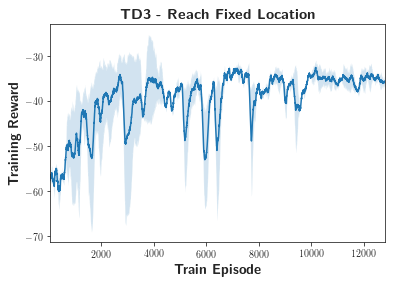

In [81]:
fig, ax = plt.subplots()
sns.set_style("ticks")
data = new_data
x = datas_x[0]
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
error = (mean - std, mean + std)

ax.fill_between(x, error[0], error[1], alpha=0.2)
ax.plot(x, mean, label='')
ax.margins(x=0)

plt.xlabel(r'\textbf{Train Episode}', size=14)
plt.ylabel(r'\textbf{Training Reward}', size=14)
plt.title(r'\textbf{TD3 - Reach Fixed Location}', size=15)

# legend = plt.legend(
#     bbox_to_anchor=(0., 1.07, 1., .102), 
#     loc=3, 
#     ncol=2, 
#     mode="expand", 
#     borderaxespad=0.)

if SAVE:
    
    plt.savefig(BASE_DIR + FIGURE_NAME, bbox_inches="tight", dpi=300) 

if SHOW:
    plt.show()